In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
from networkx.algorithms.flow import shortest_augmenting_path

In [6]:
class FlowNet:
    def __init__(self, x):
        self.x = x      
        data = open('%s' % x, "r")
        global G
        G = nx.nx.parse_edgelist(data, delimiter=';', create_using=nx.DiGraph(),nodetype=str, data=(('capacity', int),))
        pos = nx.spring_layout(G)

    def compute_max_flow(self): 
        global flow_value 
        self.flow_value, self.flow_dict = nx.maximum_flow(G, "s", "t")
        for e in G.edges :   
            G[e[0]][e[1]]['flow'] = (self.flow_dict[e[0]][e[1]])

    def get_flow(self):
        return  self.flow_value
    
    def update (self, a, b, c):
        oldCapicity = G[a][b]["capacity"]
        if self.flow_value != 0 :
            if c >= 0 :
                G[a][b]["capacity"] = c
                if c > oldCapicity :
                    self.betterUse(a, b, c)
                else :
                    self.compute_max_flow()
            else: 
                return 'erreur ! La valeur doit être positive'
    
    def betterUse(self, p1, p2, newc):
        R = shortest_augmenting_path(G, 's','t')
        self.flow_value = R.graph['flow_value']
        
    def export(self, x):   
        self.x = x
        pos = nx.random_layout(G)
        node_colors=[ 'lightgrey' for _ in G.nodes() ]
        node_colors[0]='lightgreen' 
        node_colors[G.order()-1]='red'
        labels={ e : '{}|{}'.format(G[e[0]][e[1]]['flow'],G[e[0]][e[1]]['capacity']) for e in G.edges}
        nx.draw_networkx(G, pos=pos, node_color=node_colors)
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
        plt.savefig('%s' % x)

In [7]:
n = FlowNet('fig42.csv')

In [8]:
n.compute_max_flow()

In [9]:
print("le flot maximal est :" + str(n.get_flow()))

le flot maximal est :23


In [10]:
n.update("a","c",9)

In [11]:
print("le flot maximal es :" + str(n.get_flow()))

le flot maximal es :20


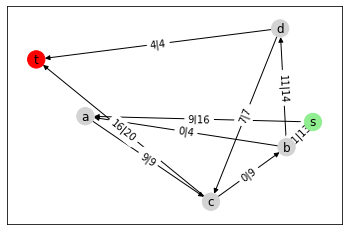

In [12]:
n.export('fig42.png')